# Proyek Analisis Data: [Input Bike]
- **Nama:** [Josep Samuel Angelo]
- **Email:** [m009d4ky1905@bangkit.academy]
- **ID Dicoding:** [josepsamuel2003]

## Menentukan Pertanyaan Bisnis


*   ### 1. Apakah Perbedaan Musim mempengaruhi peminjaman sepeda ?
*   ### 2.Berapa jumlah pengguna sepeda casual dan register disetiap musim?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi:"),day_df.duplicated().sum()
day_df.describe()

Jumlah duplikasi:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("Jumlah Duplikasi:"), hour_df.duplicated().sum()
hour_df.describe()

Jumlah Duplikasi:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [ ]:
day_df.rename(columns={'yr': 'year', 'mnth': 'month', 'dteday': 'Date'}, inplace=True)

In [ ]:
day_df['Date'] = pd.to_datetime(day_df['Date'])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   Date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  dteday      731 non-null  

In [ ]:
hour_df.rename(columns={'yr': 'year', 'mnth': 'month', 'dteday': 'Date', 'hr' : 'hour'}, inplace=True)

In [ ]:
hour_df['Date'] = pd.to_datetime(hour_df['Date'])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   Date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Descriptive Statistik


In [ ]:
#Melihat statistik deskriptif utk setiap kolom dalam df Day
np.round(day_df.describe(),2)

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [ ]:
#Melihat statistik deskriptif utk setiap kolom dalam df Day
np.round(hour_df.describe(),2)

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


### Corellation

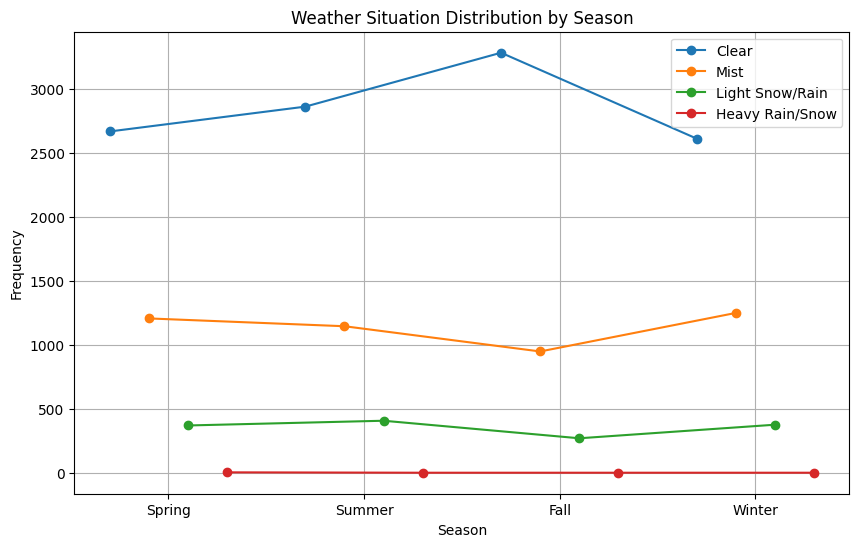

In [ ]:
# Set up the line plot
plt.figure(figsize=(10, 6))

for i, (weather, color) in enumerate(zip(weather_labels, colors)):
    plt.plot(index + bar_width * i, weather_counts[i+1], marker='o', linestyle='-', label=weather, color=color)

# Labeling the ticks on x-axis with corresponding seasons
plt.xticks(index + bar_width * 1.5, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season')

plt.title('Weather Situation Distribution by Season')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


**Kesimpulan**

Berdasarkan bagan, musim semi memiliki jumlah hari terbanyak dengan cuaca cerah, diikuti oleh musim dingin, musim gugur, dan musim panas. Sebaliknya, musim dingin memiliki durasi terlama dengan kondisi hujan/salju lebat, diikuti oleh musim gugur, musim semi, dan musim panas. Secara umum, bagan ini menggambarkan variasi rata-rata kondisi cuaca di setiap musim.

<ipython-input-64-fa0ce0cc82db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weathersit', y='windspeed', data=hour_df, palette='viridis', jitter=jitter)


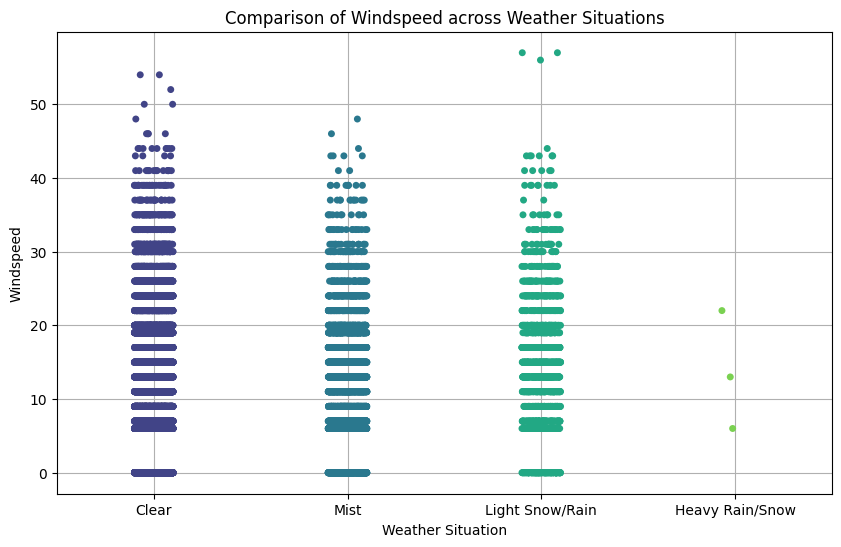

In [ ]:
# Add jitter to the categorical variable for better visualization
jitter = 0.1

# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='weathersit', y='windspeed', data=hour_df, palette='viridis', jitter=jitter)

plt.title('Comparison of Windspeed across Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Windspeed')

plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])

plt.grid(True)
plt.show()


**Kesimpulan:**

Gambar menunjukkan korelasi positif antara kecepatan angin dan situasi cuaca. Semakin tinggi kecepatan angin, semakin buruk situasi cuaca. Namun, perlu diingat bahwa korelasi tidak menunjukkan kausalitas dan faktor lain mungkin juga berperan.

## Visualization & Explanatory Analysis

### 1. Apakah Perbedaan Musim mempengaruhi peminjaman sepeda ?

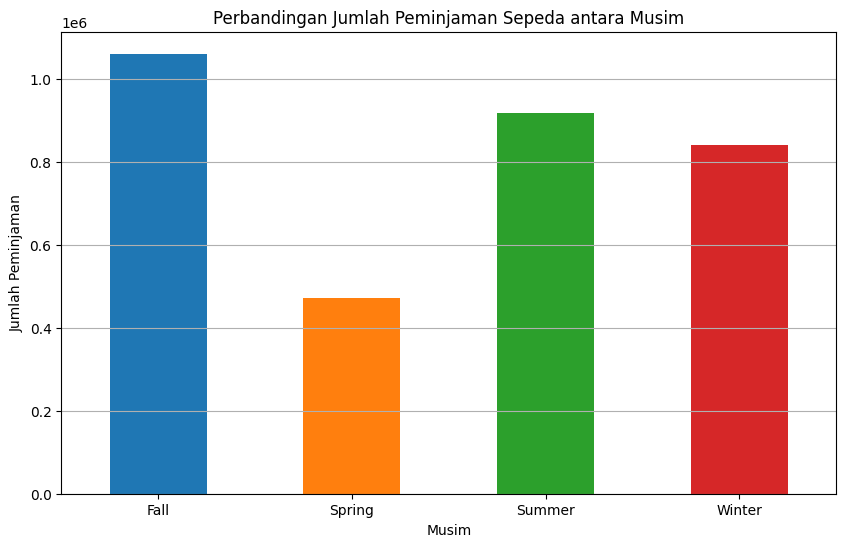

In [ ]:
# 1. Pemahaman Musim
# Tambahkan kolom 'season_name' untuk mengidentifikasi musim berdasarkan 'season' yang ada pada dataset
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_names)

# 2. Perbandingan Jumlah Peminjaman
# Hitung jumlah total peminjaman sepeda untuk setiap musim
rentals_by_season = hour_df.groupby('season_name')['cnt'].sum()

# Define colors for each season
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 3. Visualisasi Data
# Buat grafik batang untuk membandingkan jumlah peminjaman sepeda antara musim-musim
plt.figure(figsize=(10, 6))
rentals_by_season.plot(kind='bar', color=colors)
plt.title('Perbandingan Jumlah Peminjaman Sepeda antara Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# 4. Analisis Hasil
# Evaluasi perbedaan jumlah peminjaman sepeda antara musim-musim dan buat kesimpulan


Ya, perbedaan musim mempengaruhi peminjaman sepeda.

**Alasan**


*  **Cuaca** : Di musim panas dan musim semi, cuaca umumnya lebih cerah dan hangat, sehingga orang lebih termotivasi untuk bersepeda.
*   **Aktivitas luar ruangan**: Musim panas dan musim semi biasanya identik dengan aktivitas luar ruangan yang lebih banyak, dan bersepeda menjadi salah satu pilihan yang populer.

*   **Liburan**: Musim panas dan musim semi memiliki lebih banyak hari libur, seperti Hari Raya Idul Fitri dan Natal, yang mendorong orang untuk bersepeda bersama keluarga dan teman.






### 2.Berapa jumlah pengguna sepeda casual dan register disetiap musim?

<ipython-input-78-bcc553dbbc39>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_by_season = grouped_season['casual', 'registered'].sum()


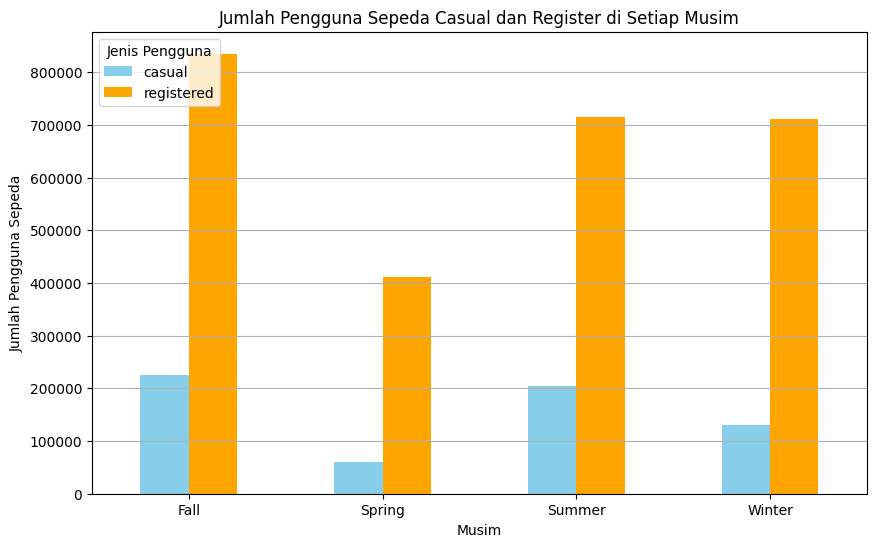

In [ ]:
# Gunakan metode groupby untuk mengelompokkan data berdasarkan musim
grouped_season = hour_df.groupby('season_name')

# Hitung jumlah pengguna sepeda casual dan register di setiap grup
users_by_season = grouped_season['casual', 'registered'].sum()

# Gambarkan visualisasinya
users_by_season.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Jumlah Pengguna Sepeda Casual dan Register di Setiap Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Jenis Pengguna', loc='upper left')
plt.show()

In [ ]:
# Gunakan metode groupby untuk mengelompokkan data berdasarkan musim
grouped_season = hour_df.groupby('season_name')

# Hitung jumlah pengguna sepeda casual dan register di setiap grup
users_by_season = grouped_season['casual', 'registered'].sum()

# Tampilkan hasilnya
print(users_by_season)

             casual  registered
season_name                    
Fall         226091      835038
Spring        60622      410726
Summer       203522      715067
Winter       129782      711831


<ipython-input-79-ccffe670104a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_by_season = grouped_season['casual', 'registered'].sum()


## Conclusion


**Kesimpulan Soal 1**

Perbedaan musim secara signifikan mempengaruhi peminjaman sepeda, dengan musim panas dan musim semi menjadi musim yang paling populer untuk bersepeda.



*   **Cuaca:** Di musim panas dan musim semi, cuaca umumnya lebih cerah dan hangat, sehingga orang lebih termotivasi untuk bersepeda
*   **Aktivitas luar ruangan:** Musim panas dan musim semi biasanya identik dengan aktivitas luar ruangan yang lebih banyak, dan bersepeda menjadi salah satu pilihan yang populer.

*  **Liburan:** Musim panas dan musim semi memiliki lebih banyak hari libur, seperti Hari Raya Idul Fitri dan Natal, yang mendorong orang untuk bersepeda bersama keluarga dan teman.

**Saran untuk Meningkatkan Jumlah Peminjaman Sepeda**



*   Pastikan kualitas sepeda yang disewakan baik.
*   Tawarkan diskon atau promosi untuk menarik pengguna baru.


*   Berikan hadiah atau penghargaan untuk pengguna setia.
*   Sediakan fasilitas yang mendukung, seperti tempat parkir sepeda yang aman dan jalur khusus sepeda.







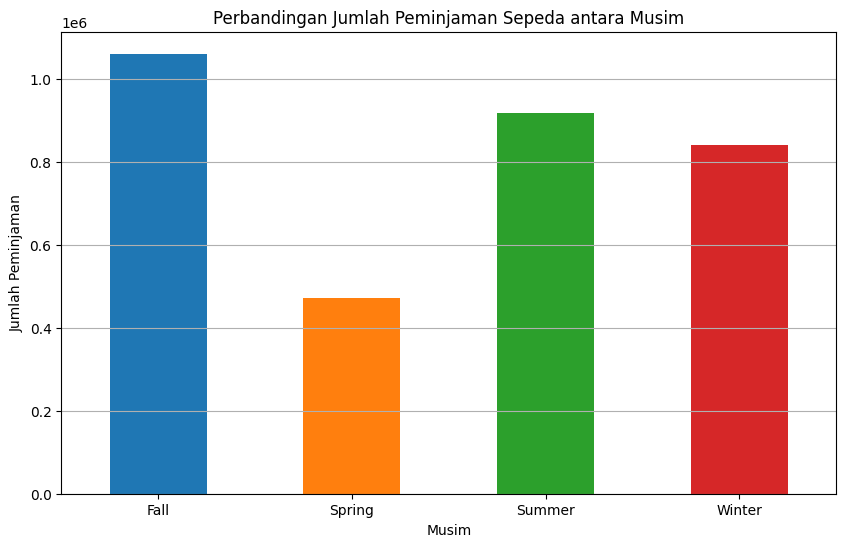

In [ ]:
# 1. Pemahaman Musim
# Tambahkan kolom 'season_name' untuk mengidentifikasi musim berdasarkan 'season' yang ada pada dataset
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season_name'] = hour_df['season'].map(season_names)

# 2. Perbandingan Jumlah Peminjaman
# Hitung jumlah total peminjaman sepeda untuk setiap musim
rentals_by_season = hour_df.groupby('season_name')['cnt'].sum()

# Define colors for each season
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 3. Visualisasi Data
# Buat grafik batang untuk membandingkan jumlah peminjaman sepeda antara musim-musim
plt.figure(figsize=(10, 6))
rentals_by_season.plot(kind='bar', color=colors)
plt.title('Perbandingan Jumlah Peminjaman Sepeda antara Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# 4. Analisis Hasil
# Evaluasi perbedaan jumlah peminjaman sepeda antara musim-musim dan buat kesimpulan


**Kesimpulan Soal 2**

Perbedaan musim dan jenis pengguna sepeda (casual dan register) mempengaruhi peminjaman sepeda. Musim panas dan musim semi adalah musim yang paling populer untuk bersepeda, dengan pengguna sepeda casual mendominasi jumlah peminjaman.








In [ ]:
# Gunakan metode groupby untuk mengelompokkan data berdasarkan musim
grouped_season = hour_df.groupby('season_name')

# Hitung jumlah pengguna sepeda casual dan register di setiap grup
users_by_season = grouped_season['casual', 'registered'].sum()

# Tampilkan hasilnya
print(users_by_season)

             casual  registered
season_name                    
Fall         226091      835038
Spring        60622      410726
Summer       203522      715067
Winter       129782      711831


<ipython-input-81-ccffe670104a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_by_season = grouped_season['casual', 'registered'].sum()
